# Exploratory Data Analysis
- Can a change in government be predicted using economic, political, and social factors of a country?
- In this analysis, we'll explore a dataset that contains various indicators across countries and years, with the goal of determining whether these indicators can help us understand or predict government changes as represented by the `Election Outcome` column.

## Import & Read Data

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Read the datasets
df_variables = pd.read_csv('/work/Merged Folder/combined-without-engineering.csv')
df_election = pd.read_csv('/work/Final_Y_100325.csv')

## Merge the Data

In [3]:
# Reshape election data from wide to long format
df_election_long = df_election.melt(id_vars=df_election.columns[0],
                                    var_name='country',
                                    value_name='Election Outcome')

In [4]:
# Rename the year column
df_election_long.rename(columns={df_election.columns[0]: 'year'}, inplace=True)
df_election_long.dropna(subset=['Election Outcome'], inplace=True)

In [5]:
# Convert year to int for merging
df_election_long['year'] = df_election_long['year'].astype(int)

In [6]:
# Merge on country and year
df_combined = pd.merge(df_variables, df_election_long, on=['country', 'year'], how='left')

## Initial Data Inspection

In [7]:
# View the first 5 observations of the dataframe
df_combined.head()

country  year  Effective Parliament (highest score=1)  \
0  Australia  1990                                    0.85   
1  Australia  1991                                    0.85   
2  Australia  1992                                    0.85   
3  Australia  1993                                    0.85   
4  Australia  1994                                    0.85   

   Election free and fair (highest score=1)  \
0                                      0.82   
1                                      0.82   
2                                      0.82   
3                                      0.82   
4                                      0.82   

   Election government intimidation (highest score=1)  \
0                                               0.85    
1                                               0.85    
2                                               0.85    
3                                               0.85    
4                                               0.85    

   Voter turnout (highest score=1)  Fair trial (highest score=1)  \
0                             0.82                           1.0   
1                             0.82                           1.0   
2                             0.82                           1.0   
3                             0.84                           1.0   
4                             0.84                           1.0   

   Judicial Independence (highest score=1)  \
0                                      1.0   
1                                      1.0   
2                                      1.0   
3                                      1.0   
4                                      1.0   

   Predictable Enforcement (highest score=1)  \
0                                        0.9   
1                                        0.9   
2                                        0.9   
3                                        0.9   
4                                        0.9   

   Freedom of Religion (highest score=1)  ...       GDP  Conflict  Deaths  \
0                                   0.98  ...  2.057392         0       0   
1                                   0.98  ... -1.643571         0       0   
2                                   0.98  ... -0.690437         0       0   
3                                   0.98  ...  3.123738         0       0   
4                                   0.98  ...  2.983092         0       0   

   Free and fair elections index  Liberal democracy index  totalrefugees  \
0                          0.956                    0.852            0.0   
1                          0.956                    0.852            0.0   
2                          0.956                    0.852            0.0   
3                          0.958                    0.852            0.0   
4                          0.958                    0.852            0.0   

   ethnicity_ratio  unemployment_percentage_change  \
0             0.84                        0.000000   
1             0.84                        0.000000   
2             0.84                       11.965366   
3             0.84                        1.360291   
4             0.84                      -10.616785   

   inflation_percentage_change  Election Outcome  
0                    -2.666355             False  
1                   -56.679860               NaN  
2                   -68.135519               NaN  
3                    73.246347             False  
4                    12.316079               NaN  

[5 rows x 34 columns]

In [8]:
# View the last 5 observations of the dataframe
df_combined.tail()

country  year  Effective Parliament (highest score=1)  \
1253          Sweden  2023                                0.910000   
1254     Switzerland  2023                                0.732391   
1255          Turkey  2023                                0.400000   
1256  United Kingdom  2023                                0.798569   
1257   United States  2023                                0.680000   

      Election free and fair (highest score=1)  \
1253                                  0.921556   
1254                                  0.840745   
1255                                  0.480000   
1256                                  0.863402   
1257                                  0.910000   

      Election government intimidation (highest score=1)  \
1253                                           0.907303    
1254                                           0.885939    
1255                                           0.440000    
1256                                           0.796038    
1257                                           0.810000    

      Voter turnout (highest score=1)  Fair trial (highest score=1)  \
1253                         0.813925                          1.00   
1254                         0.270961                          1.00   
1255                         0.968044                          0.33   
1256                         0.697260                          1.00   
1257                         0.420000                          1.00   

      Judicial Independence (highest score=1)  \
1253                                 0.922277   
1254                                 1.000000   
1255                                 0.340000   
1256                                 0.789256   
1257                                 0.864421   

      Predictable Enforcement (highest score=1)  \
1253                                   0.892014   
1254                                   0.867843   
1255                                   0.250000   
1256                                   0.760968   
1257                                   0.700000   

      Freedom of Religion (highest score=1)  ...       GDP  Conflict  Deaths  \
1253                               0.963467  ...  2.170587         0       0   
1254                               0.809435  ...  1.681790         0       0   
1255                               0.410000  ...  4.429407         1     109   
1256                               0.956745  ...  4.395999         0       0   
1257                               0.995412  ...  1.548148         0       0   

      Free and fair elections index  Liberal democracy index  totalrefugees  \
1253                          0.950                    0.852            0.0   
1254                          0.934                    0.844            0.0   
1255                          0.405                    0.113            0.0   
1256                          0.934                    0.772            0.0   
1257                          0.897                    0.772            0.0   

      ethnicity_ratio  unemployment_percentage_change  \
1253          1.00000                        2.637987   
1254          0.63000                       -5.813953   
1255          0.75000                       -9.777607   
1256          0.81500                        8.713137   
1257          0.56578                       -0.684932   

      inflation_percentage_change  Election Outcome  
1253                     2.142761               NaN  
1254                   -24.677961             False  
1255                   -25.514762               NaN  
1256                   -14.239773               NaN  
1257                   -48.563772               NaN  

[5 rows x 34 columns]

In [9]:
# View basic information about the dataframe
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country                                             1258 non-null   object 
 1   year                                                1258 non-null   int64  
 2   Effective Parliament (highest score=1)              1258 non-null   float64
 3   Election free and fair (highest score=1)            1258 non-null   float64
 4   Election government intimidation (highest score=1)  1258 non-null   float64
 5   Voter turnout (highest score=1)                     1258 non-null   float64
 6   Fair trial (highest score=1)                        1258 non-null   float64
 7   Judicial Independence (highest score=1)             1258 non-null   float64
 8   Predictable Enforcement (highest score=1)           1258 non-null   float64
 9

- The dataset contains **1258 entries** & **34 columns**.
- The **'country'** column is expected to be a **categorical variable** identifying the country
- The **'government_change'** column, which is our **target variable** indicating a change in government

## Feature Categorisation

In [10]:
# Check for duplicates
df_combined.duplicated().sum()

0

In [11]:
# Identify continuous & cateogrical feautres
df_combined.nunique()

country                                                 37
year                                                    34
Effective Parliament (highest score=1)                  89
Election free and fair (highest score=1)                77
Election government intimidation (highest score=1)      80
Voter turnout (highest score=1)                         97
Fair trial (highest score=1)                            14
Judicial Independence (highest score=1)                 88
Predictable Enforcement (highest score=1)               98
Freedom of Religion (highest score=1)                   66
Free Political Parties (highest score=1)                42
Harassment of journalists (highest score=1)             84
Media bias (highest score=1)                            80
Media freedom (highest score=1)                          8
Freedom of the Press (highest score=1)                  88
Gender Equality (highest score=1)                      105
Educational equality (highest score=1)                  

In [12]:
# View a description of the dataframe
df_combined.describe()

year  Effective Parliament (highest score=1)  \
count  1258.00000                             1258.000000   
mean   2006.50000                                0.769584   
std       9.81461                                0.115053   
min    1990.00000                                0.360000   
25%    1998.00000                                0.700000   
50%    2006.50000                                0.770000   
75%    2015.00000                                0.840000   
max    2023.00000                                1.000000   

       Election free and fair (highest score=1)  \
count                               1258.000000   
mean                                   0.838150   
std                                    0.080746   
min                                    0.480000   
25%                                    0.820000   
50%                                    0.850000   
75%                                    0.890000   
max                                    0.964626   

       Election government intimidation (highest score=1)  \
count                                        1258.000000    
mean                                            0.866289    
std                                             0.085775    
min                                             0.440000    
25%                                             0.850000    
50%                                             0.890000    
75%                                             0.910000    
max                                             1.000000    

       Voter turnout (highest score=1)  Fair trial (highest score=1)  \
count                      1258.000000                   1258.000000   
mean                          0.664599                      0.861614   
std                           0.141352                      0.201355   
min                           0.240000                      0.330000   
25%                           0.560000                      0.670000   
50%                           0.690000                      1.000000   
75%                           0.780000                      1.000000   
max                           0.968044                      1.060077   

       Judicial Independence (highest score=1)  \
count                              1258.000000   
mean                                  0.780343   
std                                   0.120319   
min                                   0.320000   
25%                                   0.710000   
50%                                   0.790000   
75%                                   0.840000   
max                                   1.000000   

       Predictable Enforcement (highest score=1)  \
count                                1258.000000   
mean                                    0.762631   
std                                     0.137772   
min                                     0.240000   
25%                                     0.690000   
50%                                     0.780000   
75%                                     0.860000   
max                                     1.000000   

       Freedom of Religion (highest score=1)  \
count                            1258.000000   
mean                                0.895917   
std                                 0.118420   
min                                 0.410000   
25%                                 0.810000   
50%                                 0.980000   
75%                                 0.980000   
max                                 1.009138   

       Free Political Parties (highest score=1)  ...  Gini coefficient  \
count                               1258.000000  ...       1258.000000   
mean                                   0.697553  ...          0.490583   
std                                    0.076357  ...          0.096829   
min                                    0.355194  ...          0.307191   
25%                                    0.630000  ...          0.429447   
50%    

In [13]:
# Convert features to improved datatypes
df_combined['country'] = pd.Categorical(df_combined['country'])
df_combined['Conflict'] = df_combined['Conflict'].astype(bool)

- **Country** needs to be changed to the **cateogrical datatype** as there only 37
- **Conflict** only has 2 options, indicate the presence or absence of conflict, so it can be changed to **boolean datatype**
- **government_change** only has 2 options, indicating if the government changes or not, so it can be changed to **boolean datatype**

In [14]:
# View the shape of the dataframe
df_combined.shape

(1258, 34)

## Univariate Analysis

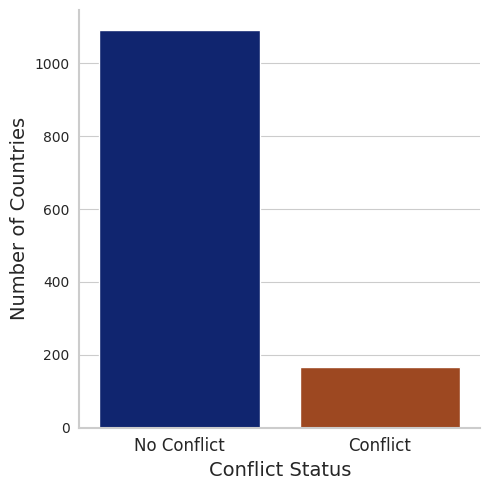

In [15]:
# Plot a count plot for Conflict
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Conflict', data=df_combined, palette='dark')

plt.xlabel('Conflict Status', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

sns.despine()
ax.set_xticklabels(['No Conflict', 'Conflict'], fontsize=12)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

- There's a **clear imbalance** in the 'Conflict' variable
- The **majority of the observations** in our dataset indicate the **absence of conflict**, while a smaller number of observations correspond to periods where conflict was present
- The **class imbalance** observed in the 'Conflict' variable means it **will need to be removed**

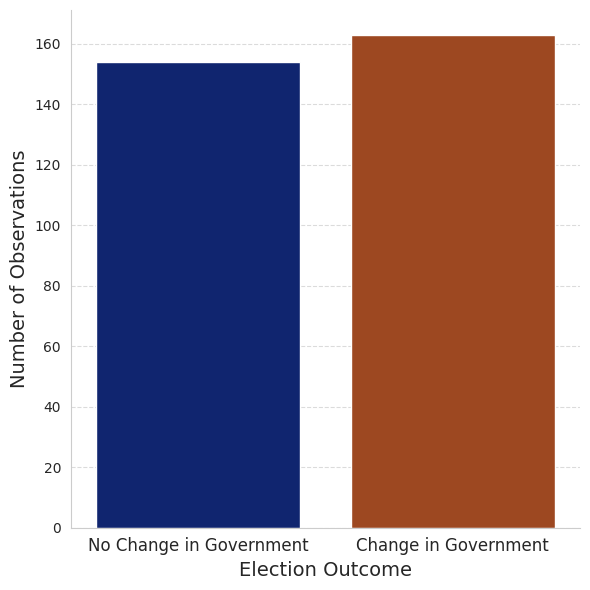

In [16]:
# Plot a count plot for Election Outcomes
filtered_df = df_combined[df_combined['Election Outcome'].notna()]
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Election Outcome', data=filtered_df, palette='dark')

plt.xlabel('Election Outcome', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)

plt.xticks([0, 1], ['No Change in Government', 'Change in Government'], fontsize=12)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- The **class distribution** for government change is **fairly balanced**:
    - **51.4%** of observations show a government change
    - **48.6%** show no change
- This is a **positive sign** for building a predictive model, as a highly imbalanced target variable can sometimes lead to biased models

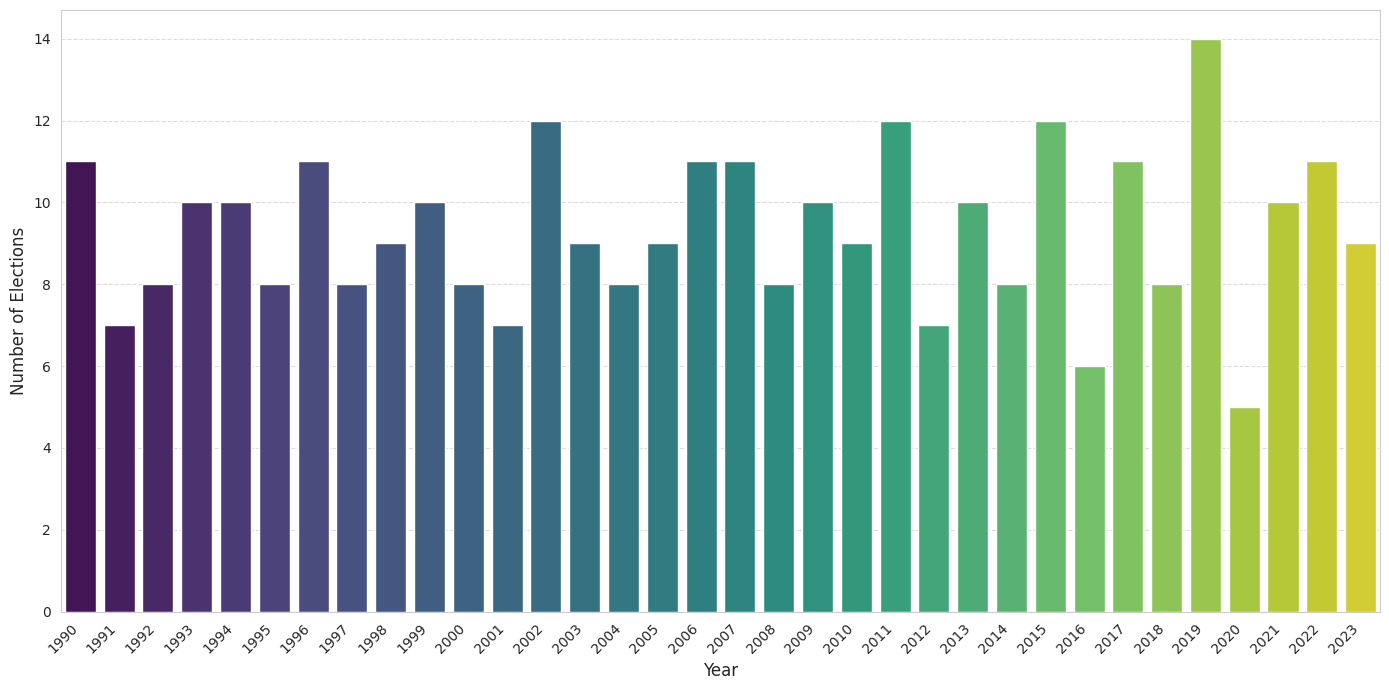

In [17]:
# Plot a bar plot for the number of elections per year
elections_only = df_combined[df_combined["Election Outcome"].notna()]
elections_per_year_simple = elections_only.groupby("year").size().reset_index(name="elections")

plt.figure(figsize=(14, 7))
sns.barplot(data=elections_per_year_simple, x="year", y="elections", palette="viridis")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Elections", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

- **Most active election year: 2019** had the highest number of elections (~14)
- **Years with fewer elections: 2016 & 2020** show relatively low counts (around 5-6), which **might be linked to global events** (e.g., COVID-19 in 2020)

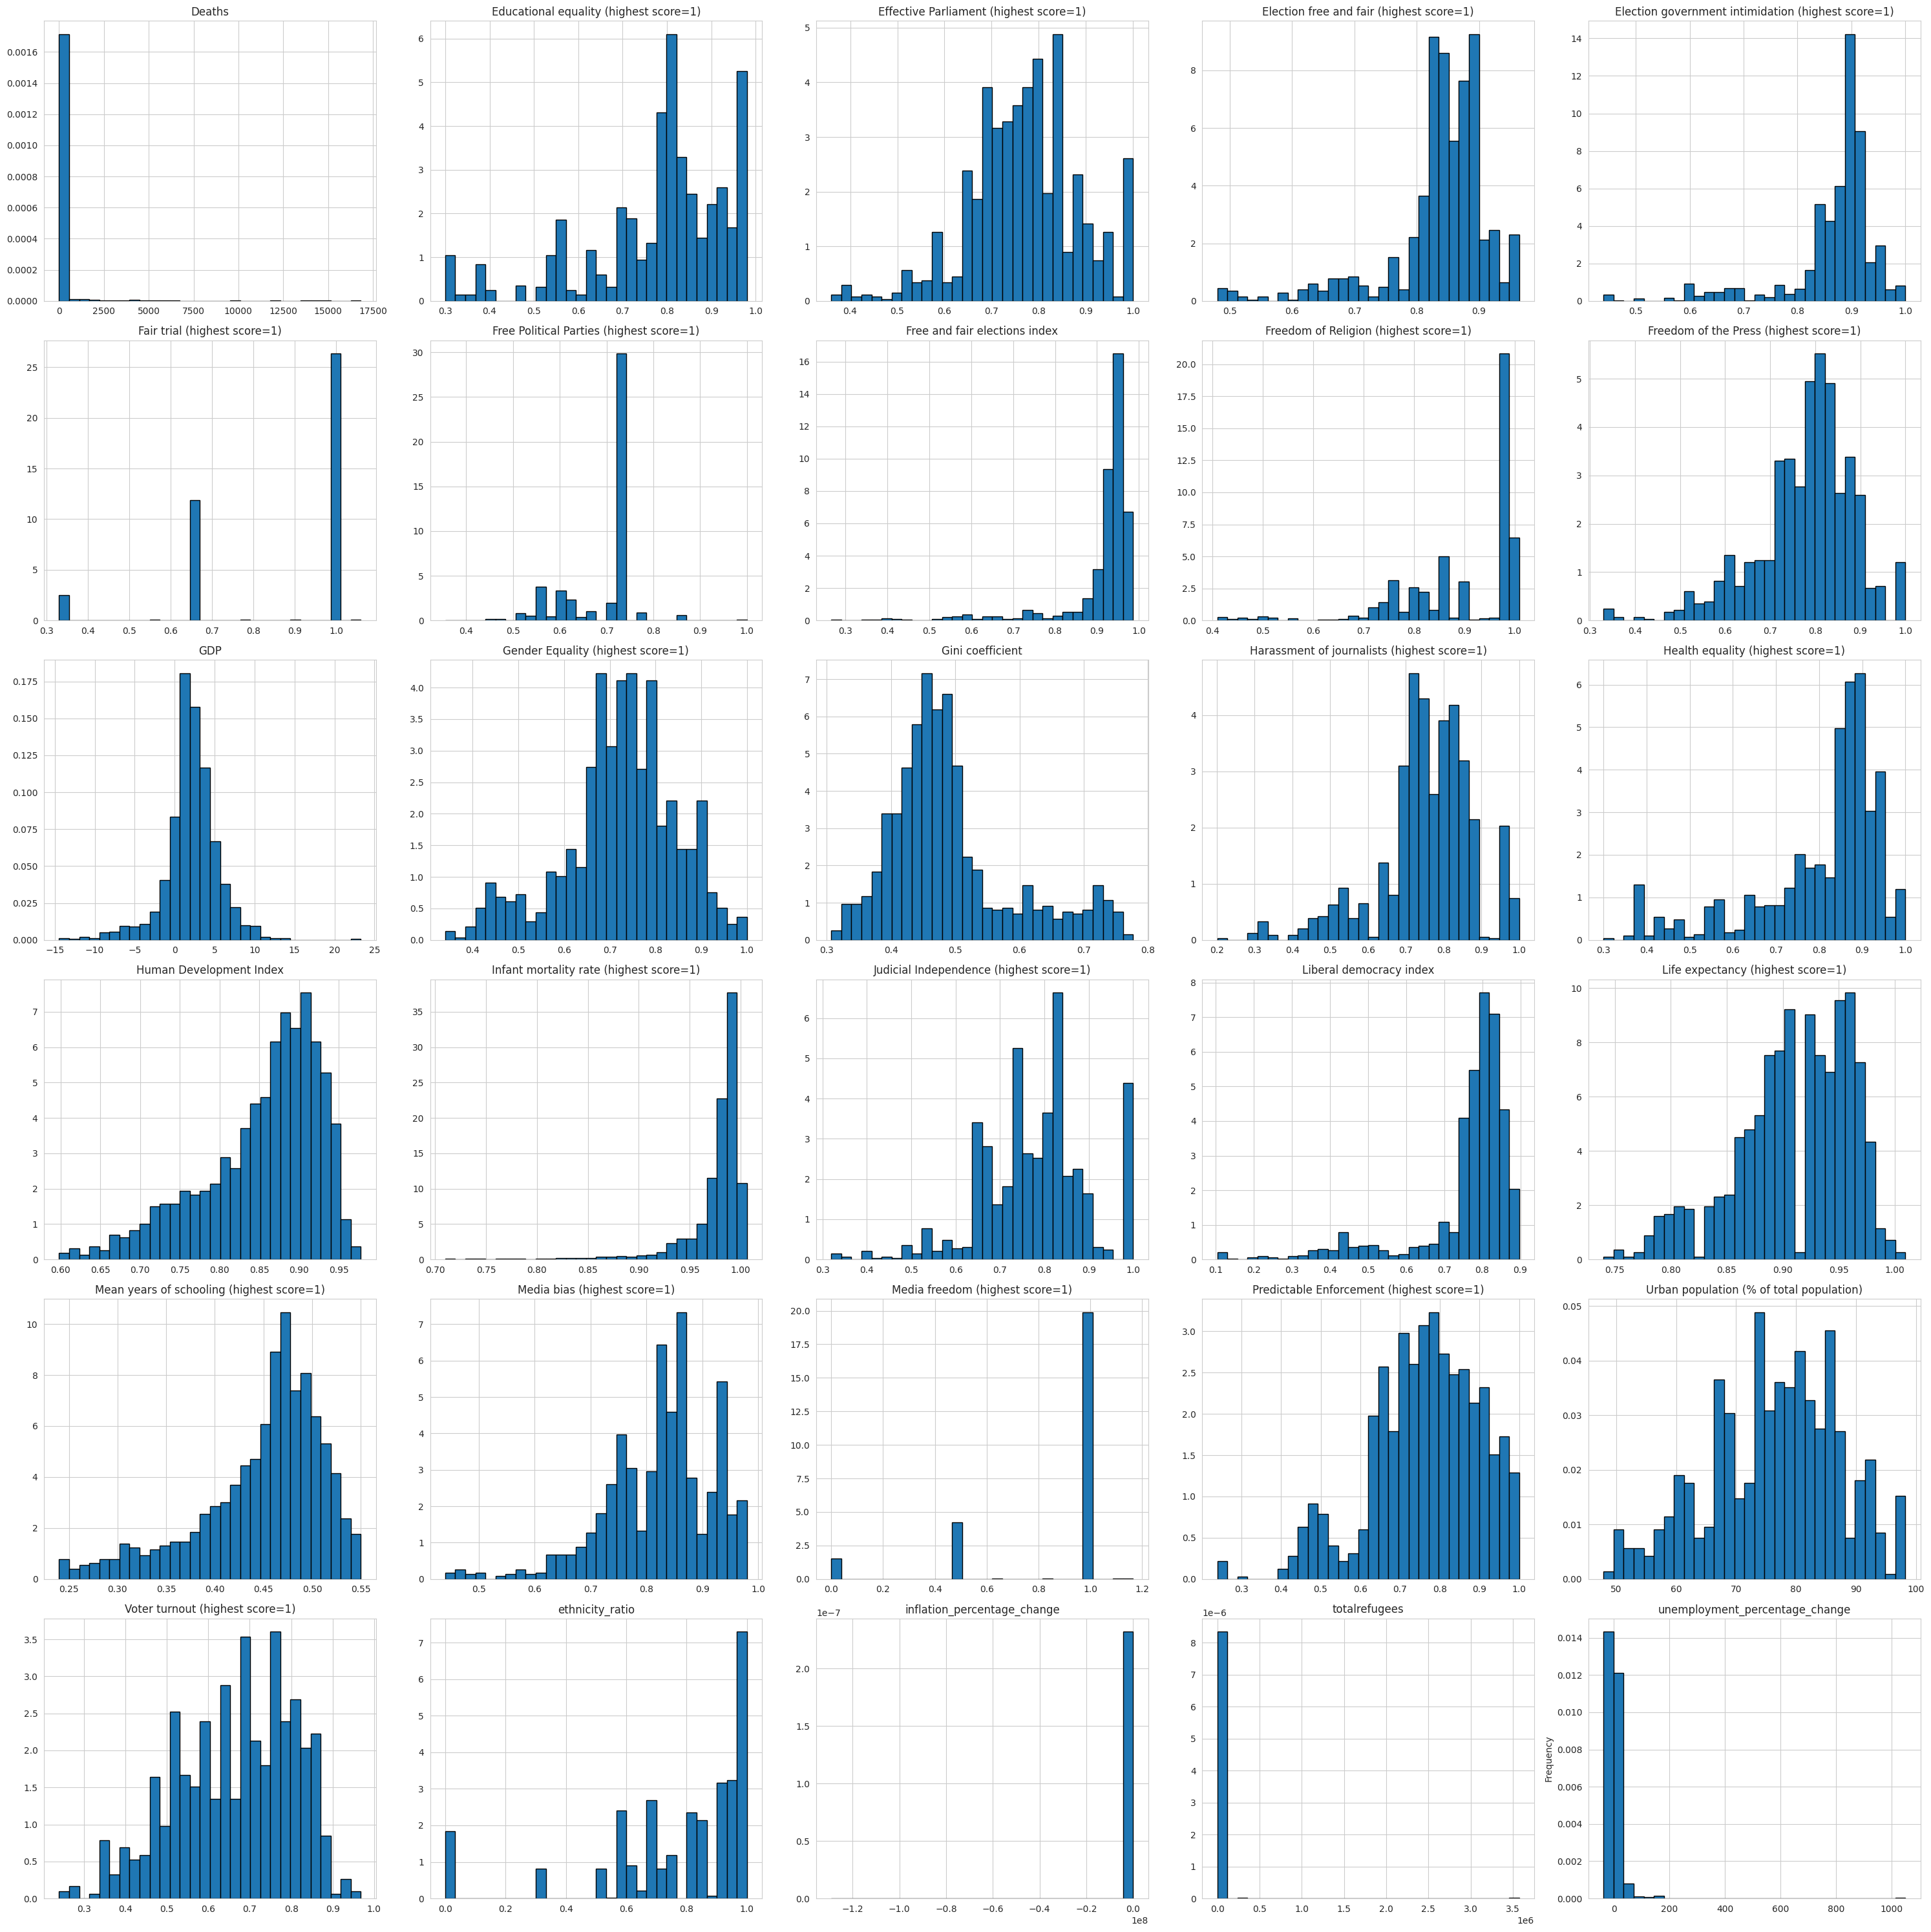

In [18]:
# Plot histograms of features
numerical_cols = df_combined.columns.difference(['country', 'year', 'conflict', 'Election Outcome'])
df_combined[numerical_cols].hist(figsize=(30, 30), bins=30, density=True, edgecolor='black')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- The histograms show that the following variables are **heavily skewed with almost all values concentrated at or near zero**:
    - Deaths, totalrefugees, inflation_percentage_change, unemployment_percentage_change
- These features **offer little to no variance across most observations**, which:
    - Makes them **statistically uninformative for pattern recognition**
    - **Risks introducing noise** into your model



In [19]:
# Drop features with concentrated near zero
df_combined = df_combined.drop(['Conflict', 'Deaths', 'totalrefugees', 'inflation_percentage_change', 'unemployment_percentage_change'], axis=1)

In [20]:
# Define the features
numerical_cols = df_combined.columns.difference(['country', 'year', 'Election Outcome'])

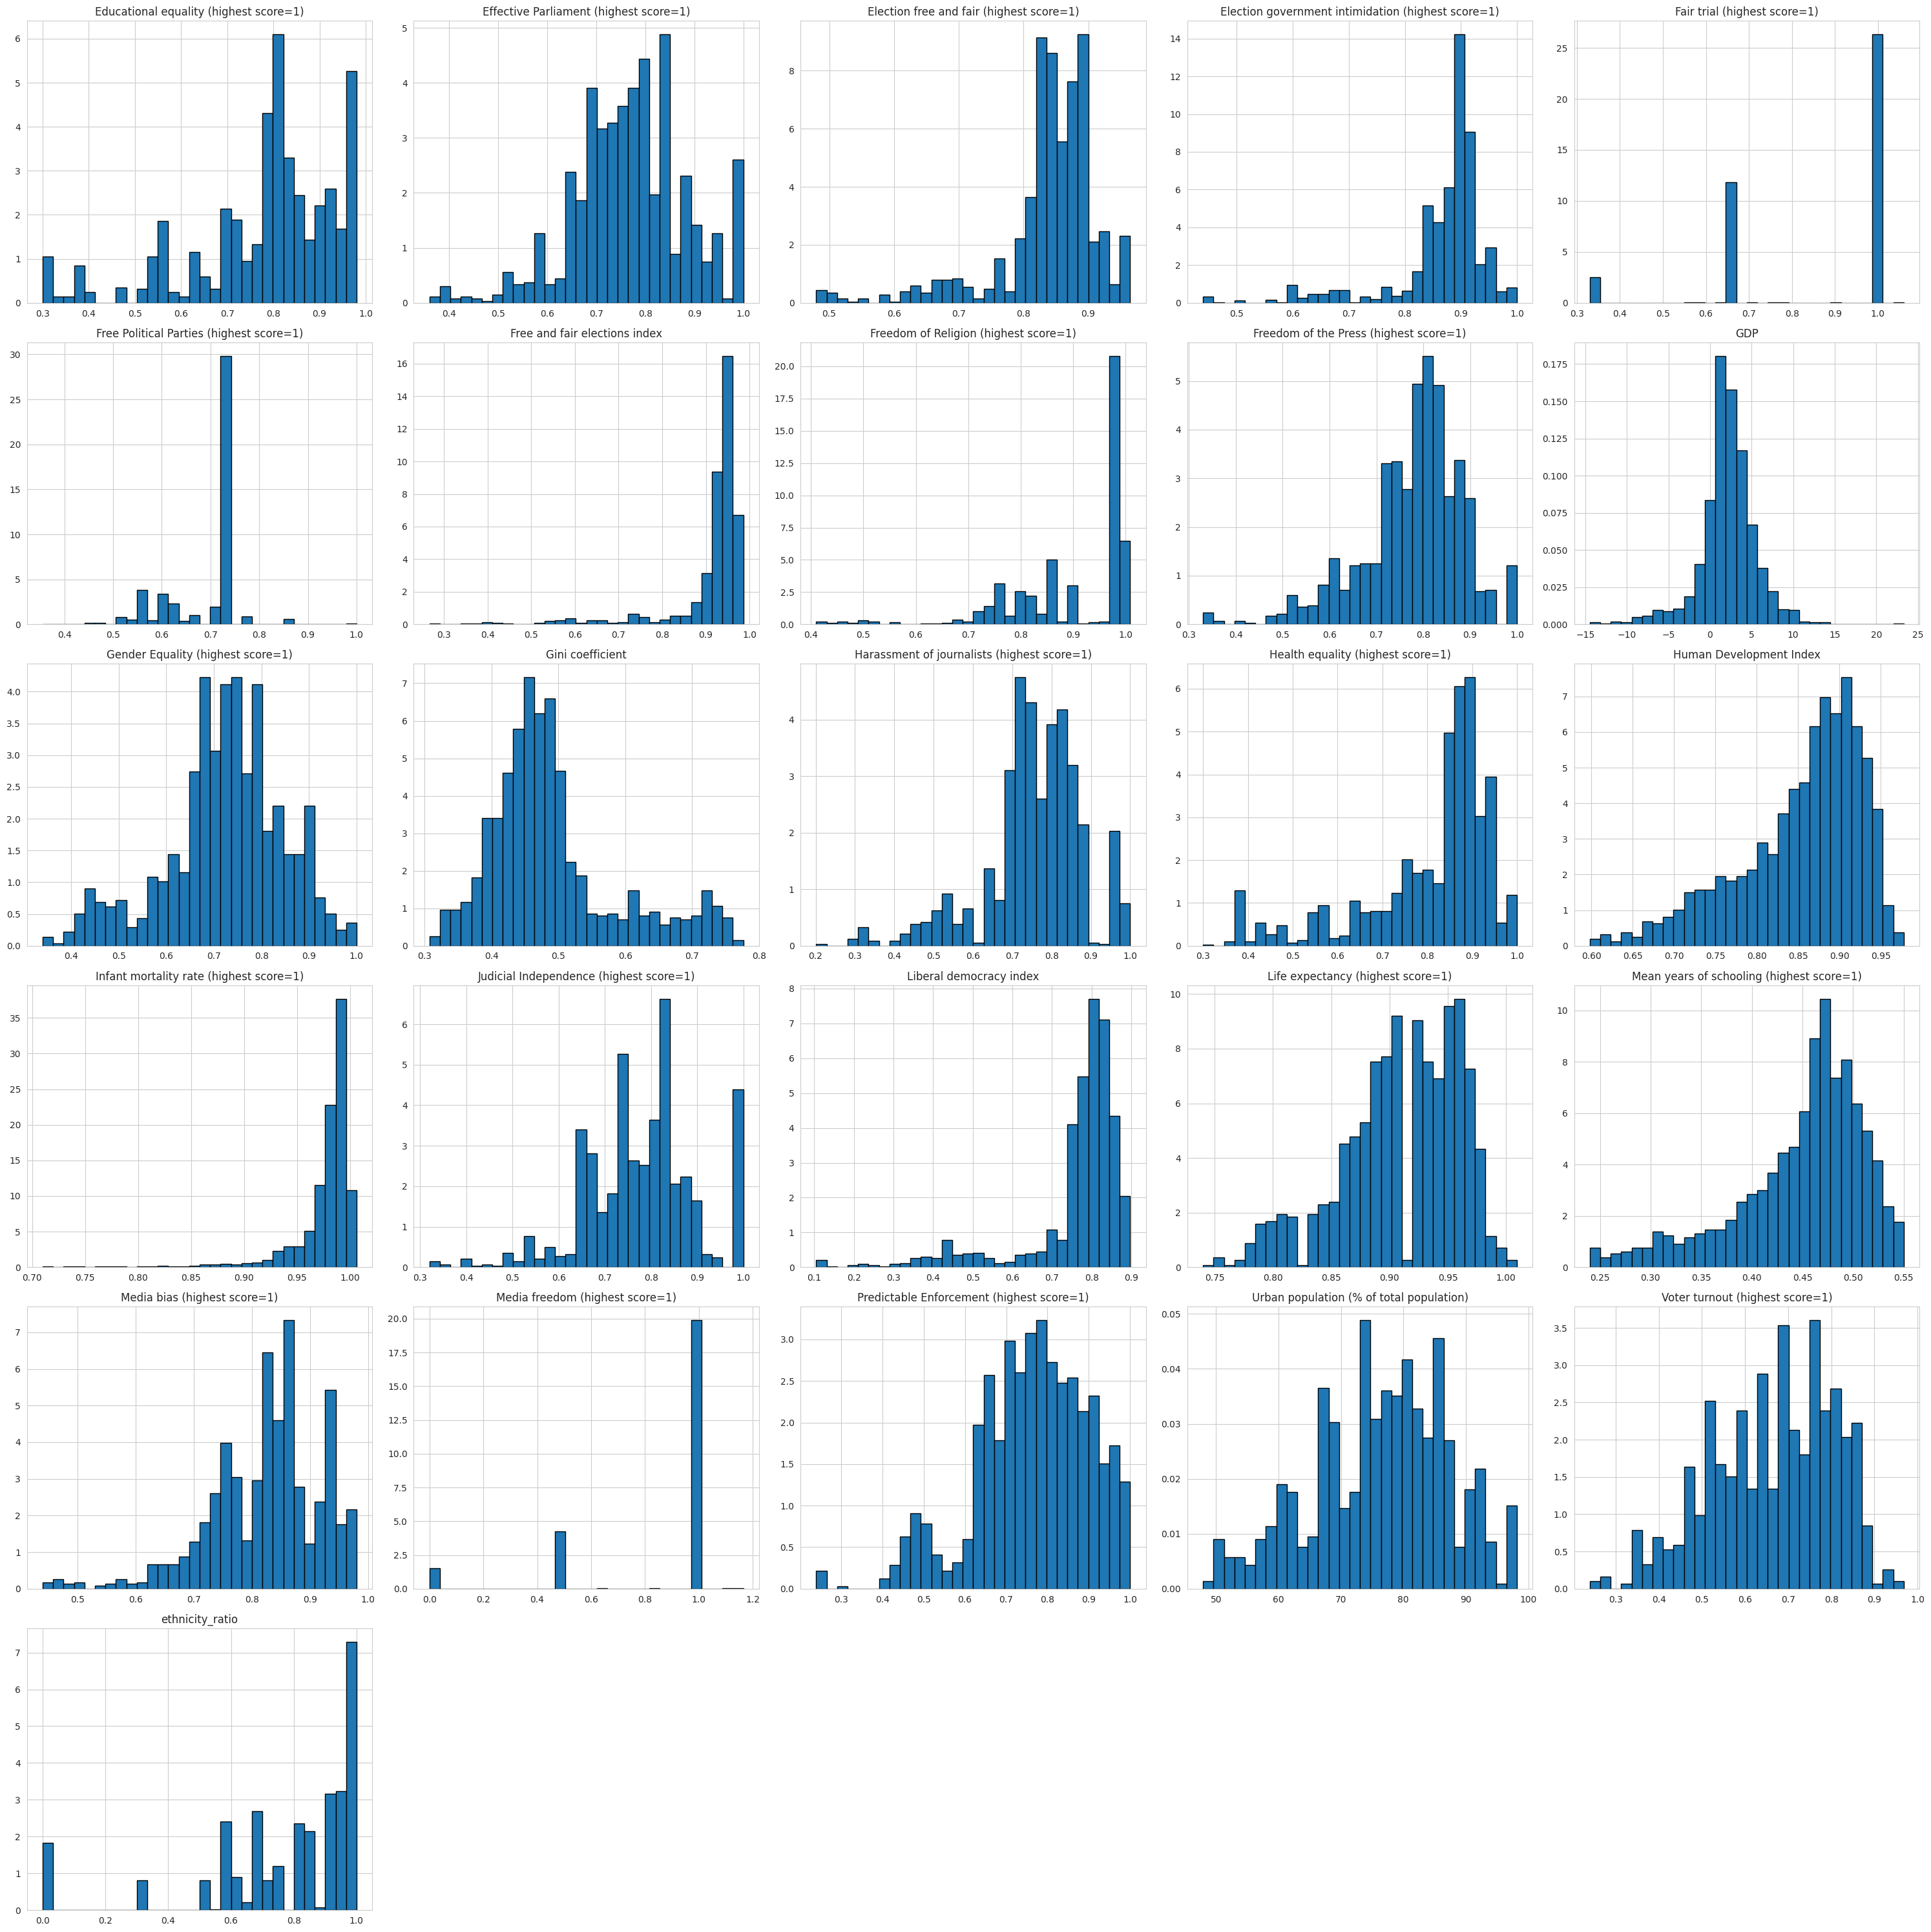

In [21]:
# Plot the histograms of the features
df_combined[numerical_cols].hist(figsize=(30, 30), bins=30, density=True, edgecolor='black')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- Several indicators (e.g., Freedom of Religion Infant Mortality Rate, Free & Fair Election index) are **heavily right-skewed with a strong concentration near 1**
    - This indicates that **many countries in the dataset score well** on these democratic or human development indicators
- Features like **Media Freedom, Fair Trial** show more **varied or even bimodal distributions**, suggesting **wider disparities among countries**
- Variables like **Effective Parliament, Gender Equality, and Urban Population are more evenly spread**, capturing a wide range of development levels across countries
    - These will be **valuable for predictive modelling** since they offer **clear differentiation across countries**

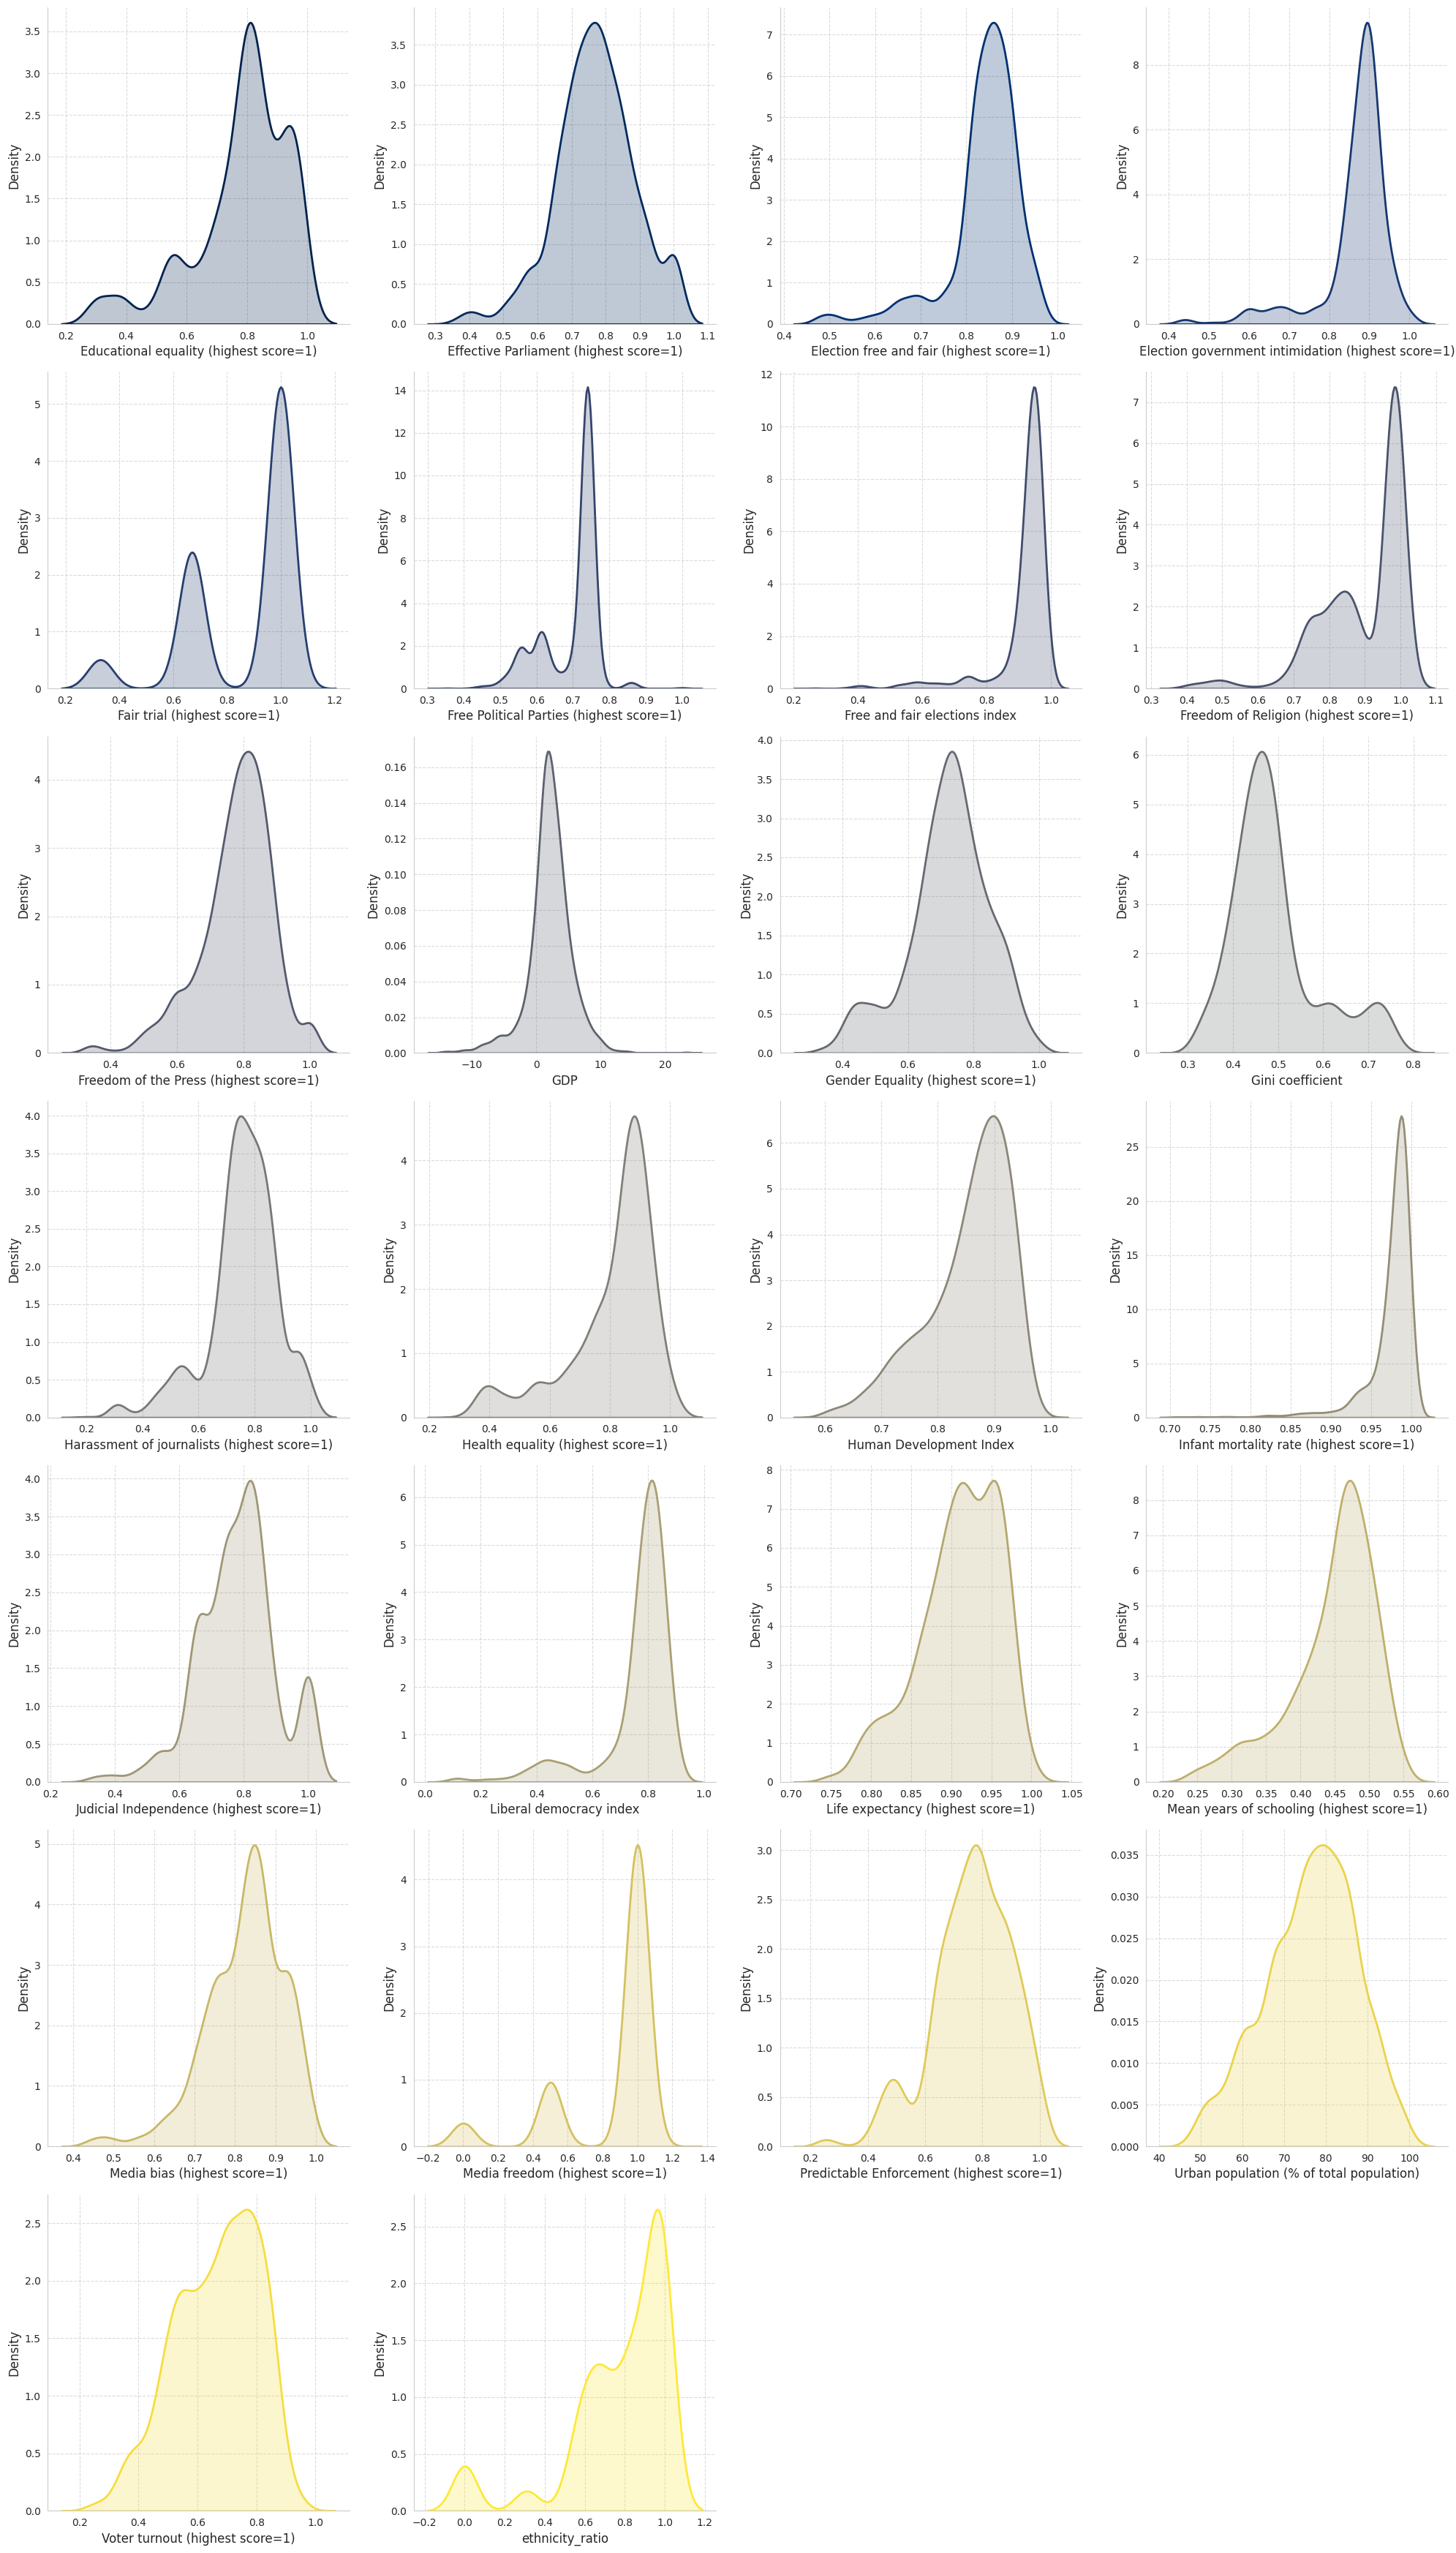

In [22]:
# Plot the Kernel Density plots of the features
num_cols = len(numerical_cols)
num_rows = math.ceil(num_cols / 4)

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.flatten()
colours = plt.cm.cividis(np.linspace(0, 1, num_cols))

for i, col in enumerate(numerical_cols):
    sns.kdeplot(df_combined[col], fill=True, color=colours[i], linewidth=2, ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.7)
    sns.despine(ax=axes[i])

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- **Right-skewed** (Most countries perform well):
    - Election Government Intimidation, Election Free and Fair, Gini coefficient, Infant mortality rate all show **strong peaks near 1**, indicating **many countries perform strongly** on these democratic & development-related metrics
    - These might have lower predictive power

- **Multimodal Distributions** (Uneven global standards):
    - Fair Trial, Media Freedom show **multiple peaks**
    - These distributions suggest **clear subgroups of countries** — useful for clustering

- **Normal Distributions**:
    - Variables like Voter turnout, Urban Population, and Effective Parliament appear normally distributed, giving **balanced predictive potential**

## Bivariate Analysis

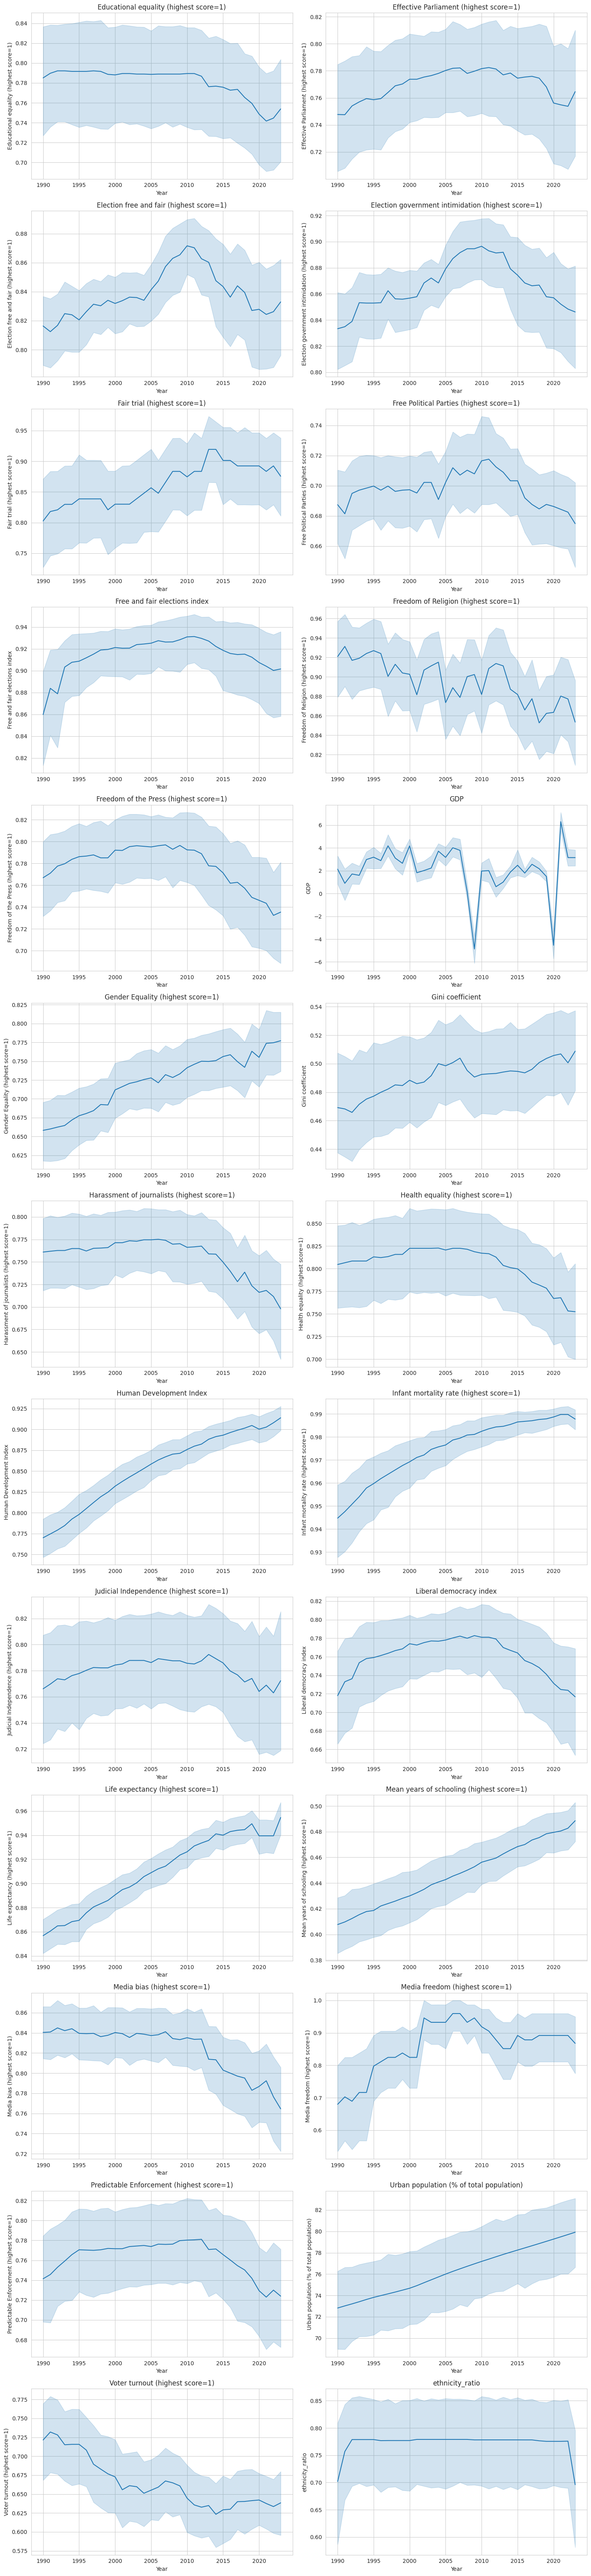

In [23]:
# Plot the lineplots of the features over time
num_cols = len(numerical_cols)
num_rows = math.ceil(num_cols / 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.lineplot(x='year', y=col, data=df_combined, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Year')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- Indicators Showing **Decline or Reversal**
    - Several features **peak between 2005-2012, then decline**, indicating a global dip in democratic quality or stability:
        - Election Free & Fair: **Slow decline post 2010**
        - Election Government Intimidation: **Sharper decline post 2010**
        - Free Political Parties: **Sharp decline post 2011**
- These could *point to worsening institutional strength*, potentially *raising the likelihood of government change*

- Indicators Showing **Improvement Over Time**
    - Some features **improved steadily over decades**:
        - Gender Equality, Gini coefficient, Human Development Index : **Consistent upward trend, reflecting progress globally**
        - Urban Population, Mean years of schooling: **Linear growth**, suggesting increasing urbanisation & improved school education.
- While positive, these improvements **might not directly predict instability**

- **Volatile Trends**
    - GDP: **Spiky**, with **massive dips** around 2008 (financial crisis) and 2020 (pandemic) — might **correlate with specific bursts in government change**
    - Freedom of religion: A relatively high level of freedom of religion throughout the observed period, with **scores generally above 0.85**
        - There appears to be a **slight downward trend** in the freedom of religion score in the **later years**, particularly after around 2010
- These metrics reflect voltility, making them **strong candidates for modelling change in governance**



- **Parallel Trends**
    - Media Bias & Harassment of Journalists — exhibit **similar downward trends since the early 2010s**
    - This suggests:
        - A **global increase** in media freedom & independence
        - **Decreased pressure or control from government**s over the media environment
- These trends are valuable in predictive modelling, as they may **signal a rise in true political coverag**e, allowing the people **voting to be better informed**

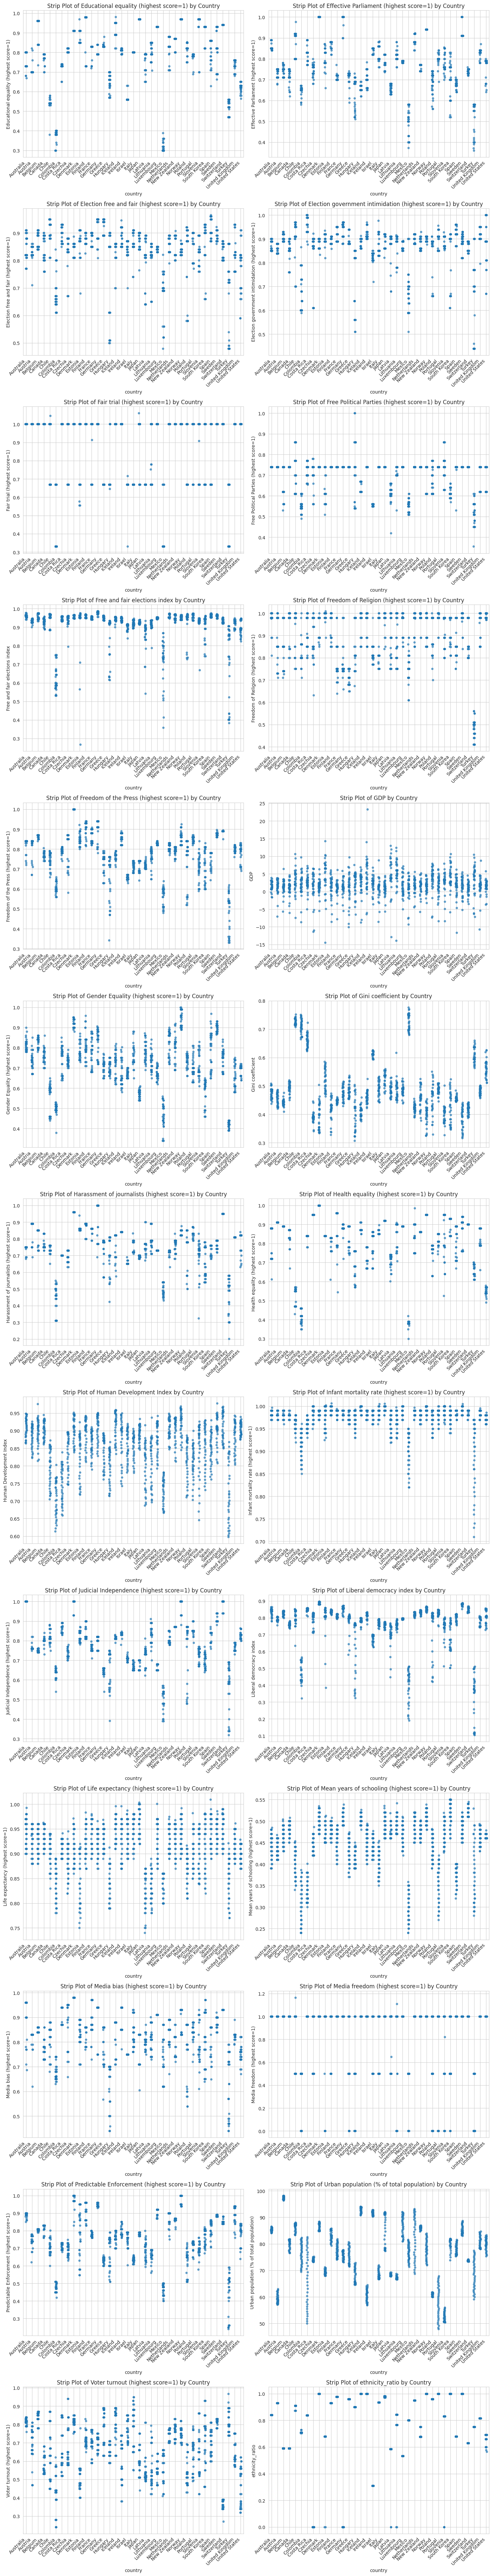

In [24]:
# Plot the strip plots of features by country
num_cols = len(numerical_cols)
num_rows = math.ceil(num_cols / 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 6 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.stripplot(x='country', y=col, data=df_combined, jitter=True, dodge=True, alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Strip Plot of {col} by Country')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- **Cross-Country Variability is High** for Most Indicators
    - Features like Effective Parliament, Human Development Index, Voter turnout show **broad vertical scatter — meaning countries have wide differences, suggesting high diversity**
- These are powerful for modelling because they **help differentiate political environments & governance quality**

- Some Features Are **Highly Polarised**
    - Media Freedom, Fair Trial, and Free Political Parties have **clear clustering at specific values** (e.g., around 1 or 0.7), indicating:
        - *Many countries share similar structural setups*
    - In some cases, this **may reduce feature usefulness for fine-grained prediction**

- Indicators With **Linear or Tiered Structures**
    - Features like Infant mortality rate, Life expectency, and Human Development Index show a **gradual spread rather than sharp clusters**, which is **ideal for capturing economic gradients**

## Multivariate Analysis

In [25]:
# Create a list of the economic factors
economic_factors = ['GDP', 'Gini coefficient']

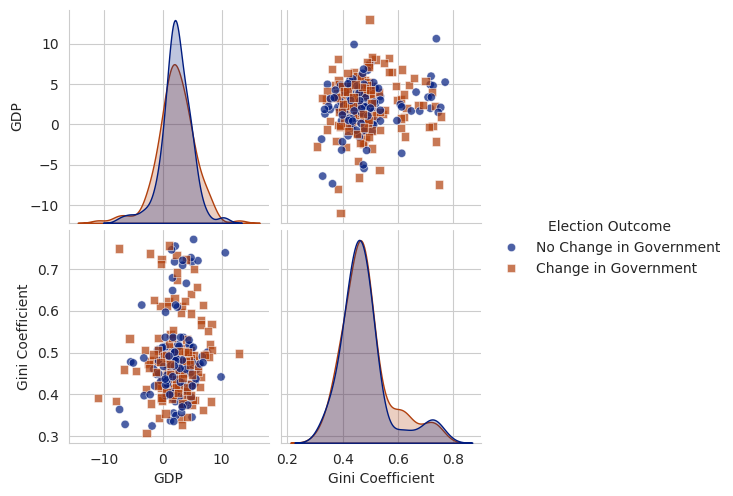

In [26]:
# Plot the pairplot of economic factors
df_combined['Election Outcome'] = df_combined['Election Outcome'].map({1: 'Change in Government', 0: 'No Change in Government'})

g = sns.pairplot(df_combined,
                 vars=economic_factors,
                 hue='Election Outcome',
                 diag_kind='kde',
                 palette='dark',
                 markers=["o", "s"],
                 plot_kws={'alpha': 0.7},
                 diag_kws={'shade': True})

for ax in g.axes.flat:
    if ax.get_xlabel() == 'Gini coefficient':
        ax.set_xlabel('Gini Coefficient')
    if ax.get_ylabel() == 'Gini coefficient':
        ax.set_ylabel('Gini Coefficient')

plt.savefig('pairplot.png')
plt.show()

- **GDP**
    - KDE indicates that **countries without government change (blue) skew slightly toward higher GDPs**
    - **Government changes (orange) occur more frequently in countries with lower or near-zero GDP growth**, supporting the idea that **economic stagnation/decline may trigger political turnover**

- **Gini Coefficient**
    - The Gini distributions are **very similar**, but the **orange curve is slightly flatter & shifted right**, suggesting that **greater inequality might be slightly more associated with government change**

- **Scatter Plot**
    - The scatter shows that election change happens across the spectrum, but:
        - There's **a visible cluster of change events (orange) in countries with low GDP + mid-to-high inequality**
        - This may suggest **combined economic pressure (low growth + inequality) could be more impactful than either factor alone**

In [27]:
# Convert Election Outcomes to binary
df_election_years = df_combined.copy()
df_election_years["Election Outcome"] = df_election_years["Election Outcome"].map({'Change in Government': 1, 'No Change in Government': 0})

In [30]:
# Compute correlation matrix
corr_matrix = df_election_years.drop(columns=['year']).corr(numeric_only=True)

# Get correlations with the target variable
target_corr = corr_matrix["Election Outcome"].drop("Election Outcome").sort_values(key=abs, ascending=False)
target_corr_sorted = target_corr.sort_values(ascending=False)

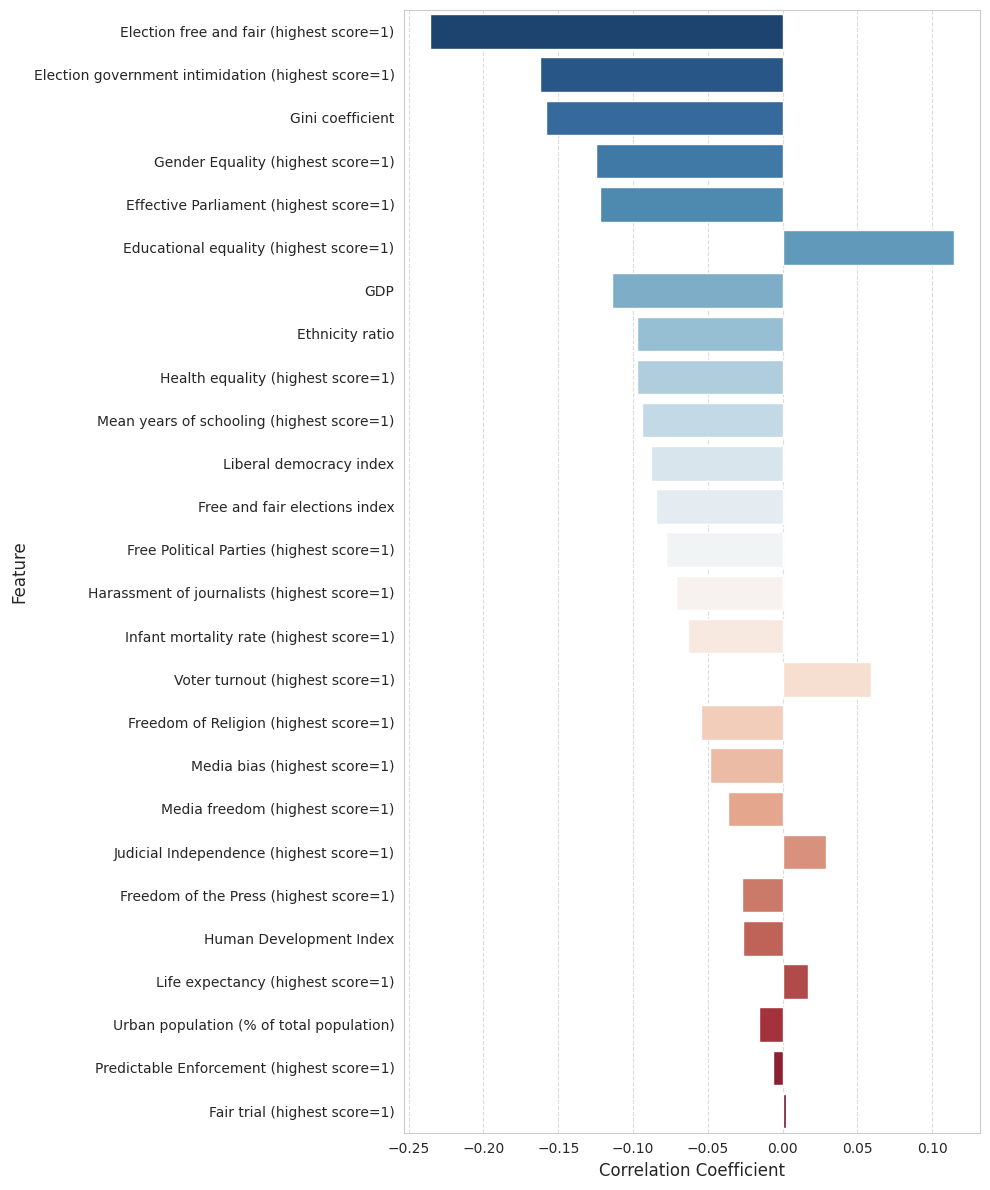

In [32]:
# Plot the bar plot of correlations with the target variable
plt.figure(figsize=(10, 12))
sns.barplot(y=target_corr_sorted.index.str.replace('ethnicity_ratio', 'Ethnicity ratio'),
            x=target_corr.values,
            palette="RdBu_r")

plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Strongest Negative Correlations**
    - These features are **most associated with a decrease in the likelihood of government change**:
        - Fair Trial (≈ -0.22)
        - Predictable Enforcement & Urban Population (≈ -0.16)
    - Countries with strong institutions & high urbanisation tend to experience fewer government changes — possibly due to increased procedural consistency

- **Weak Positive Correlations**
    - Election Free and Fair shows a slight increase in value (≈ +0.07) when election change occurs
    - In more open & democratic systems, government changes may occur more regularly via elections, hence a positive association with the political freedom indicators

- **Neutral or Weak Features**
    - Near-zero correlation for:
        - GDP
        - Gini Coefficient
        - Education, Gender & Health Equality
    - These variables **don't show strong linear relationships** — but they **may still contribute in non-linear models** (e.g., Random Forest, XGBoost)

- This matrix helps highlight initial relationships between features and the target variable, however **correlation doesn't imply causation**

## Conclusion

- This exploratory analysis builds a foundation for the machine learning phase of the project
- Through these steps, we:
    - Identified potential key variables across economic, political, and social domains
    - Analysed how these features behave when a government changes
    - Explored possible patterns across time & geography

- By combining these findings, we aim to develop a model that can reasonably **predict a future government change**, potentially offering value to political scientists & policy makers

## Export the DataFrame

In [34]:
# Drop the Election Outcomes
df_combined = df_combined.drop('Election Outcome', axis=1)

In [32]:
# Export the dataset
df_combined.to_csv('combined_features_removed.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=63ad4e1b-19bb-4dd7-a997-1fa3d2fd82a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>